In [2]:
import numpy as np
from keras import layers,models
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(train_data,train_labels),(test_data,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [4]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
train_data.shape # set de 60000 imagenes con pixeles de 28 x 28

(60000, 28, 28)

In [6]:
 #train_data[0] # si revisamos este elemento se ve un arreglo de 28*28 con valores entre [0-255]

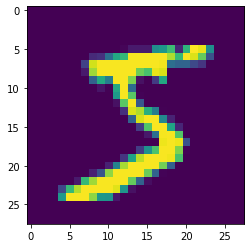

In [7]:
plt.imshow(train_data[0])

In [8]:
train_labels[0]

5

In [9]:
#Declarando modelo
model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics='accuracy')

In [11]:
model.summary() #con esto podemos la arquitectura de la red

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
#modificando un poco la Data
x_train = train_data.reshape((60000,28*28)) #hacemos esto para dejar los datos en 2 dimensiones
x_train = x_train.astype('float32')/255  # esto con el fin de volver los datos en decimales y como cada  arreglo tiene datos de entre 0-255
                                   # si dividimos los float entre 255 estamos normalizando los datos

#hacemos lo mismo para la data de test       
x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255                             

In [13]:
x_train[0] # asi quedan los datos

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
y_train = to_categorical(train_labels)
y_test  = to_categorical(test_labels)

In [15]:
#si comparamos  un dato de entrenamiento antes y despues de aplicar "to_categorical"
print(train_labels[0])
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Entrenando el modelo Clase(5/28)

In [16]:
model.fit(x_train,y_train,epochs=5,batch_size=128)
                         #epochs=5 , 5 iteraciones.
                         #batch_size=128 en paquetes de 128 iteraciones

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2571 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1039 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0693 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0495 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0381 - accuracy: 0.9883


In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9783


[0.0713634192943573, 0.9782999753952026]